In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [22]:
np.random.seed(100)
random_data = np.random.normal(loc=0, scale=0.1, size=(800, 10))
print(random_data.shape)

(800, 10)


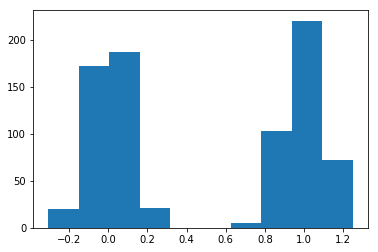

In [23]:
xor_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]], dtype='float64')
repeat_data = np.tile(xor_data, (200, 1))
y_label = repeat_data[:, -1]
raw_data = np.delete(repeat_data, -1, 1)
mu, sigma = 0, 0.1
noise_vector = np.random.normal(mu, sigma, 800)
raw_data[:, 0] += noise_vector
raw_data[:, 1] += noise_vector
plt.hist(raw_data[:, 0])
plt.show()

In [24]:
data = np.concatenate((raw_data, random_data), axis=1)
print(data, data.shape)

[[-0.13543652 -0.13543652 -0.17497655 ..., -0.10700433 -0.01894958
   0.02550014]
 [-0.11115209  0.88884791 -0.0458027  ...,  0.10297327 -0.04381356
  -0.11183182]
 [ 1.07711636  0.07711636  0.16189817 ...,  0.13615561 -0.03262381
   0.0055676 ]
 ..., 
 [ 0.06120716  1.06120716 -0.20882461 ..., -0.1445458   0.03364695
   0.04600467]
 [ 0.90291567 -0.09708433  0.03508262 ..., -0.03177131  0.01694767
  -0.04023396]
 [ 0.94866622  0.94866622 -0.02735225 ..., -0.16966704  0.06463822
   0.03494299]] (800, 12)


In [25]:
# Define layers for AutoEncoder
encoding_dim = 2

input_dim = Input(shape=(12,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_dim)
decoded = Dense(12, activation='sigmoid')(encoded)

# This is the model for an AutoEncoder
autoencoder = Model(input_dim, decoded)

# Create encoder and decoder
encoder = Model(input_dim, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [26]:
# Compile the model
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(optimizer=sgd, loss='mean_squared_error')

In [27]:
# Work with dataset
x_train, x_test, y_train, y_test = train_test_split(data, y_label, test_size=0.2)
autoencoder.fit(x_train, x_train,
               epochs=40,
               batch_size=5,
               shuffle=True,
               validation_data=(x_test, x_test))


Train on 640 samples, validate on 160 samples
Epoch 1/40
640/640 [==============================] - 0s - loss: 0.1183 - val_loss: 0.0679
Epoch 2/40
640/640 [==============================] - 0s - loss: 0.0608 - val_loss: 0.0574
Epoch 3/40
640/640 [==============================] - 0s - loss: 0.0556 - val_loss: 0.0542
Epoch 4/40
640/640 [==============================] - 0s - loss: 0.0532 - val_loss: 0.0521
Epoch 5/40
640/640 [==============================] - 0s - loss: 0.0511 - val_loss: 0.0496
Epoch 6/40
640/640 [==============================] - 0s - loss: 0.0486 - val_loss: 0.0473
Epoch 7/40
640/640 [==============================] - 0s - loss: 0.0458 - val_loss: 0.0442
Epoch 8/40
640/640 [==============================] - 0s - loss: 0.0431 - val_loss: 0.0417
Epoch 9/40
640/640 [==============================] - 0s - loss: 0.0407 - val_loss: 0.0397
Epoch 10/40
640/640 [==============================] - 0s - loss: 0.0388 - val_loss: 0.0379
Epoch 11/40
640/640 [======================

(160, 12)
(160, 2)


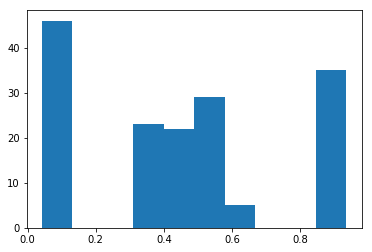

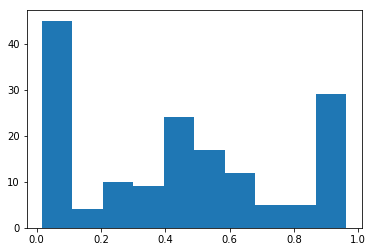

In [28]:
encoded_vectors = encoder.predict(x_test)
print(x_test.shape)
print(encoded_vectors.shape)
plt.hist(encoded_vectors[:, 0])
plt.show()
plt.hist(encoded_vectors[:, 1])
plt.show()

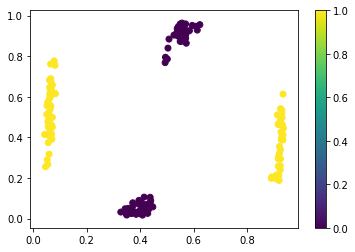

In [29]:
plt.scatter(encoded_vectors[:, 0], encoded_vectors[:, 1], c=y_test)
plt.colorbar()
plt.show()